In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import mplcyberpunk
import warnings

plt.style.use("cyberpunk") 
warnings.filterwarnings("ignore")

In [3]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.0
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 15
mpl.rcParams["axes.labelsize"] = 10
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5.0
mpl.rcParams["axes.titlepad"] = 10.0
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [4]:
train = pd.read_csv("train_satisfaction.csv")
test = pd.read_csv("test_satisfaction.csv")


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             25893 non-null  object
 1   Customer Type                      25893 non-null  object
 2   Age                                25893 non-null  int64 
 3   Type of Travel                     25893 non-null  object
 4   Class                              25893 non-null  object
 5   Flight Distance                    25893 non-null  int64 
 6   Inflight wifi service              25893 non-null  int64 
 7   Departure/Arrival time convenient  25893 non-null  int64 
 8   Ease of Online booking             25893 non-null  int64 
 9   Gate location                      25893 non-null  int64 
 10  Food and drink                     25893 non-null  int64 
 11  Online boarding                    25893 non-null  int64 
 12  Seat

In [46]:
train.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
92189,Male,Loyal Customer,22,Personal Travel,Eco,1017,1,0,1,5,...,1,3,5,4,3,4,1,0,0.0,neutral or dissatisfied
99235,Male,Loyal Customer,55,Personal Travel,Eco,296,3,5,2,5,...,1,5,3,5,4,5,1,5,0.0,neutral or dissatisfied
22749,Female,Loyal Customer,38,Business travel,Eco Plus,371,5,4,4,4,...,5,4,3,5,4,5,5,0,0.0,satisfied
6331,Female,Loyal Customer,48,Business travel,Business,2947,1,1,1,1,...,4,4,4,4,4,4,3,0,0.0,satisfied
18863,Female,Loyal Customer,33,Personal Travel,Eco,641,4,4,4,4,...,4,3,3,4,4,4,4,0,0.0,neutral or dissatisfied
65586,Male,Loyal Customer,44,Personal Travel,Eco,584,3,2,3,3,...,3,4,4,4,4,4,3,0,5.0,neutral or dissatisfied
68536,Female,Loyal Customer,14,Personal Travel,Eco,862,3,4,3,3,...,2,3,3,5,4,4,2,58,39.0,neutral or dissatisfied
33228,Male,Loyal Customer,39,Business travel,Business,329,5,5,5,5,...,4,4,4,4,4,4,4,0,0.0,satisfied
63939,Male,Loyal Customer,14,Personal Travel,Eco,214,3,1,3,1,...,2,4,4,1,3,2,2,0,0.0,neutral or dissatisfied
79156,Female,Loyal Customer,45,Business travel,Business,3738,2,2,2,2,...,5,5,5,5,5,5,3,0,0.0,satisfied


In [11]:
pd.DataFrame({"null/train":train.isnull().sum()/train.shape[0],
              "null/test": test.isnull().sum()/test.shape[0]}).sort_values("null/train", ascending=False) 

,null/train,null/test
Gender,0.0,0.0
Seat comfort,0.0,0.0
Arrival Delay in Minutes,0.0,0.0
Departure Delay in Minutes,0.0,0.0
Cleanliness,0.0,0.0
Inflight service,0.0,0.0
Checkin service,0.0,0.0
Baggage handling,0.0,0.0
Leg room service,0.0,0.0
On-board service,0.0,0.0


In [13]:
train.duplicated().sum()

0

In [5]:
for i in [train,test]:
    i.drop(["id", "Unnamed: 0"], axis=1, inplace=True) 
    i.dropna(inplace=True)

In [12]:
train.satisfaction.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

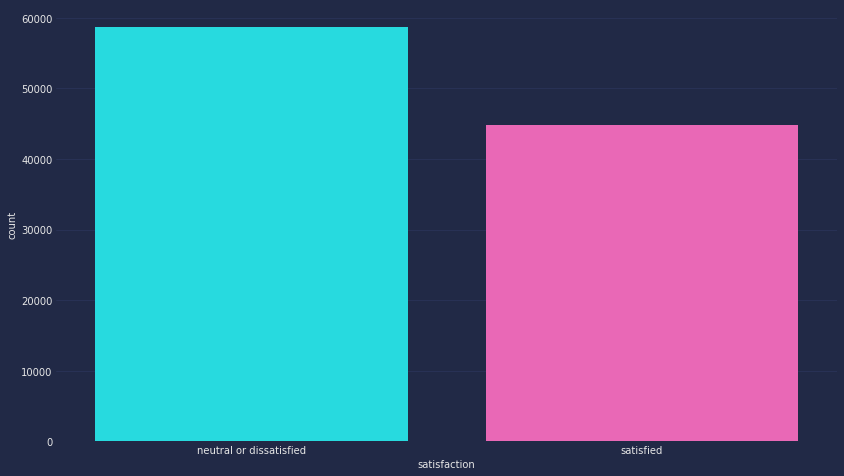

In [13]:
plt.figure(figsize=(14,8))
sns.countplot(train["satisfaction"])

In [7]:
cater = train.select_dtypes(exclude="number")
number = train.select_dtypes("number")
number.shape, cater.shape

((103594, 18), (103594, 5))

In [17]:
cater.describe().T

,count,unique,top,freq
Gender,103594,2,Female,52576
Customer Type,103594,2,Loyal Customer,84662
Type of Travel,103594,2,Business travel,71465
Class,103594,3,Business,49533
satisfaction,103594,2,neutral or dissatisfied,58697


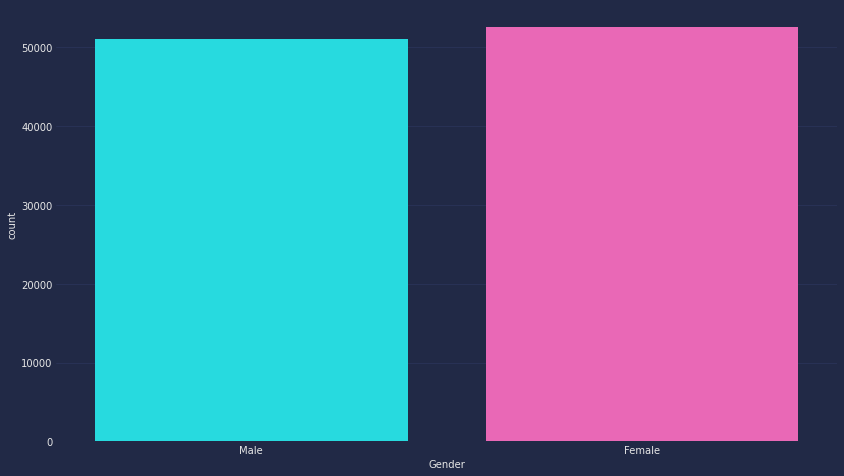

In [31]:
plt.figure(figsize=(14,8))

sns.countplot(train["Gender"])  

In [32]:
train.groupby("Gender")["satisfaction"].value_counts().to_frame()

satisfaction
Gender satisfaction                         
Female neutral or dissatisfied         30107
       satisfied                       22469
Male   neutral or dissatisfied         28590
       satisfied                       22428

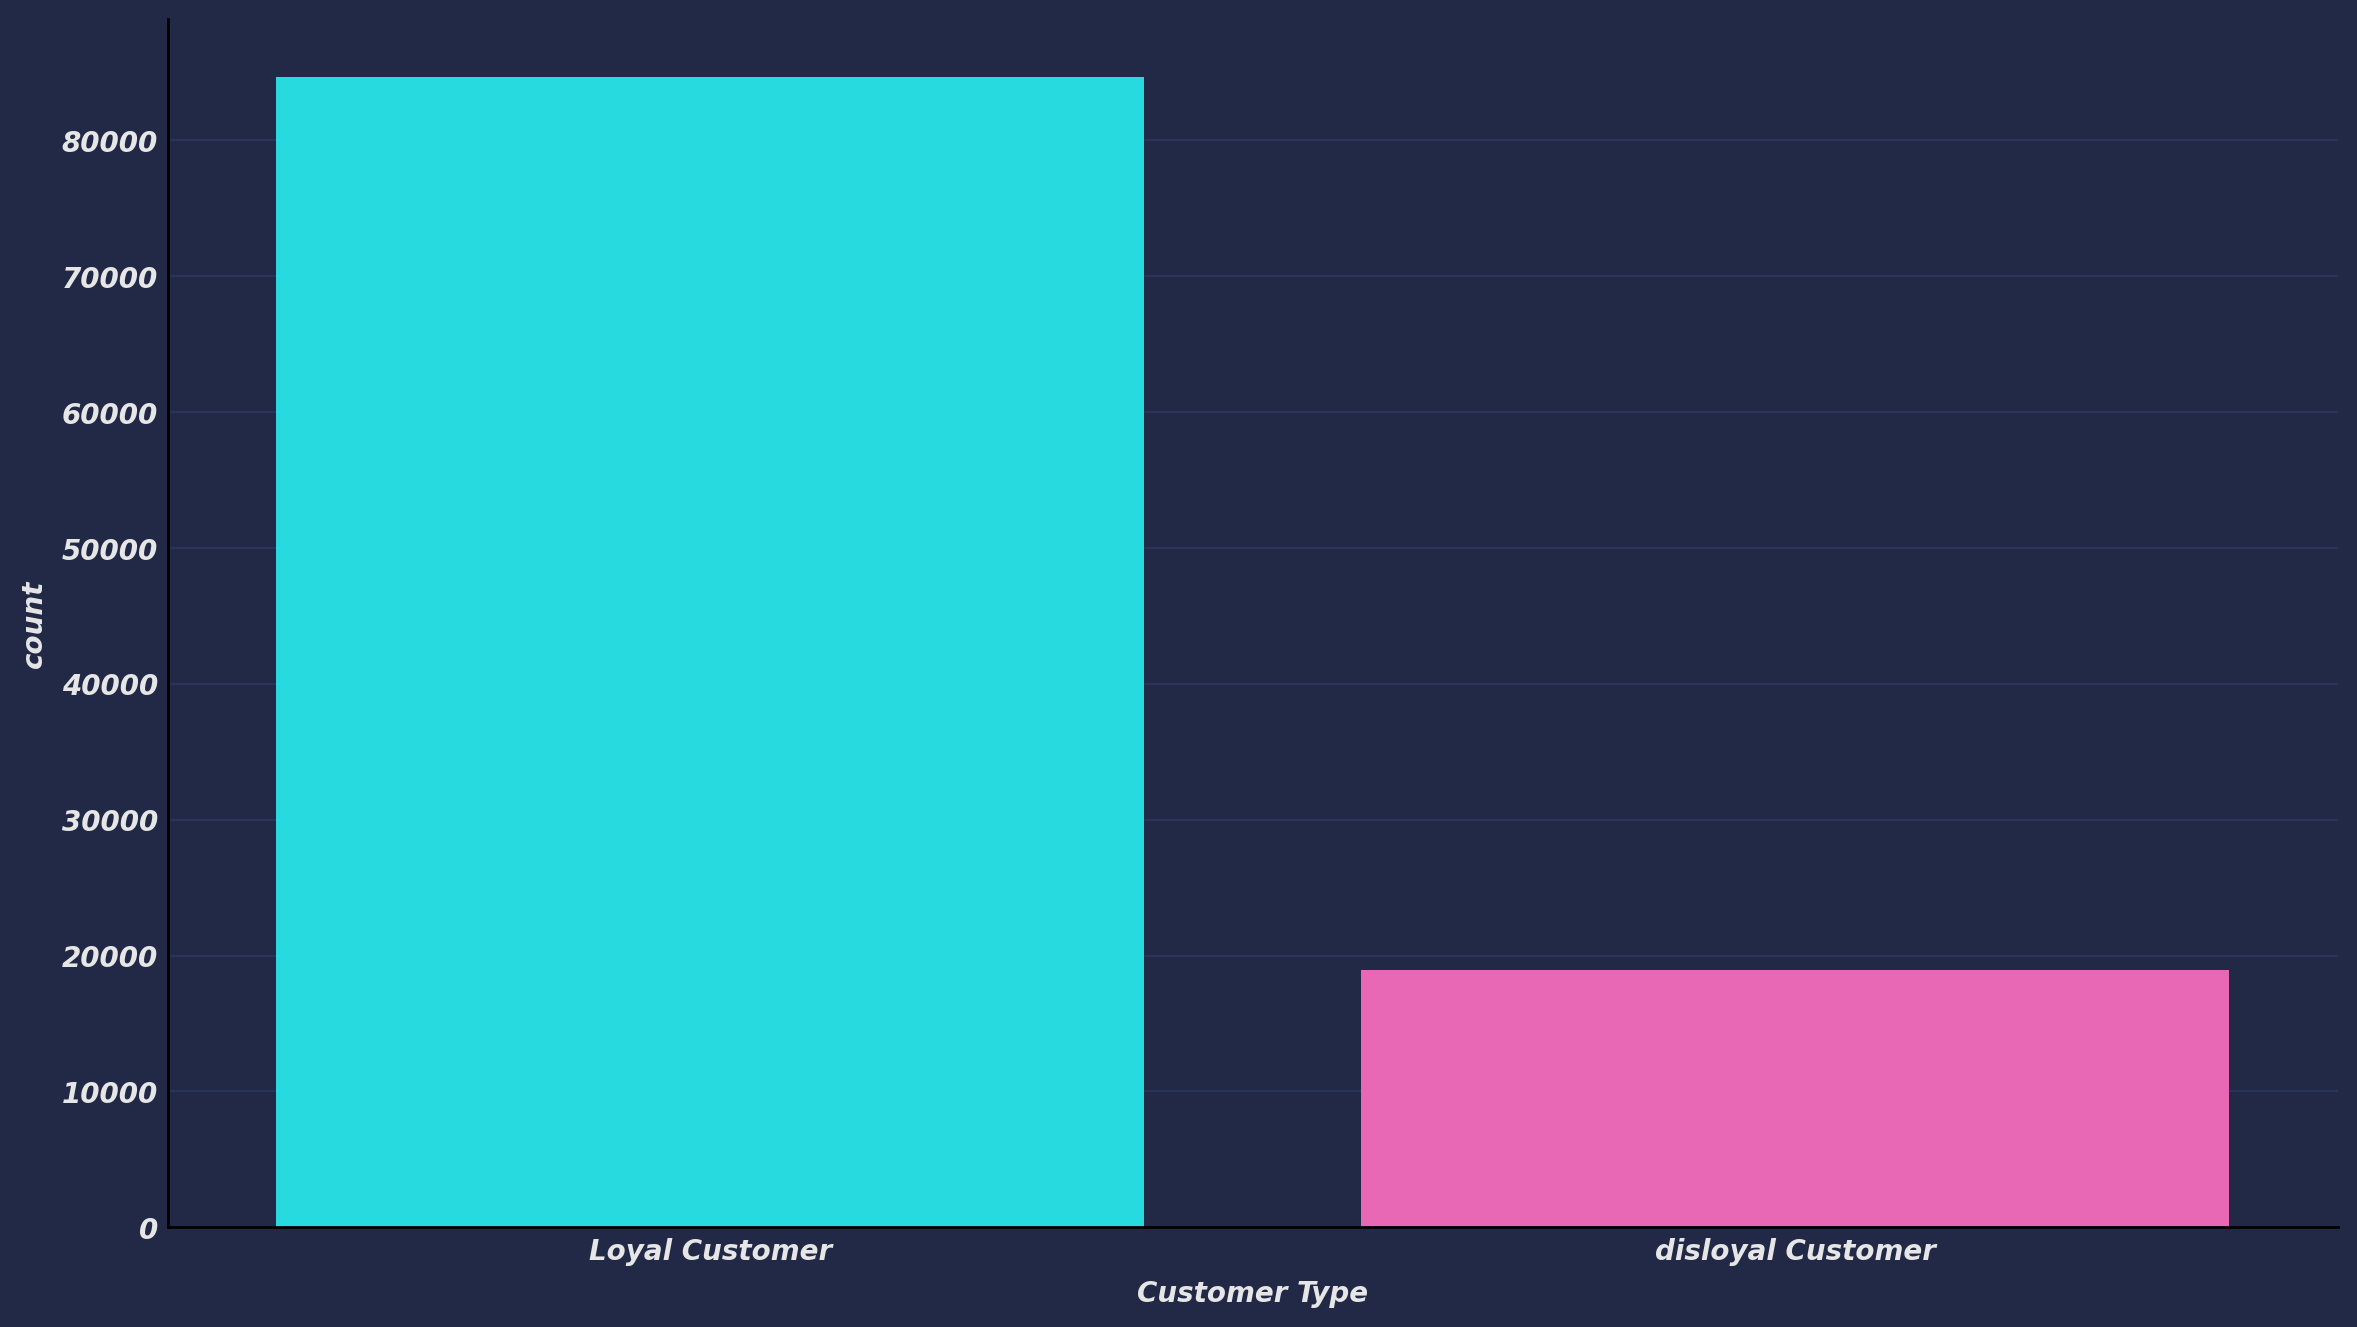

In [41]:
plt.figure(figsize=(14,8))

sns.countplot(train["Customer Type"])  

In [42]:
train.groupby("Customer Type")["satisfaction"].value_counts().to_frame()

satisfaction
Customer Type     satisfaction                         
Loyal Customer    neutral or dissatisfied         44249
                  satisfied                       40413
disloyal Customer neutral or dissatisfied         14448
                  satisfied                        4484

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

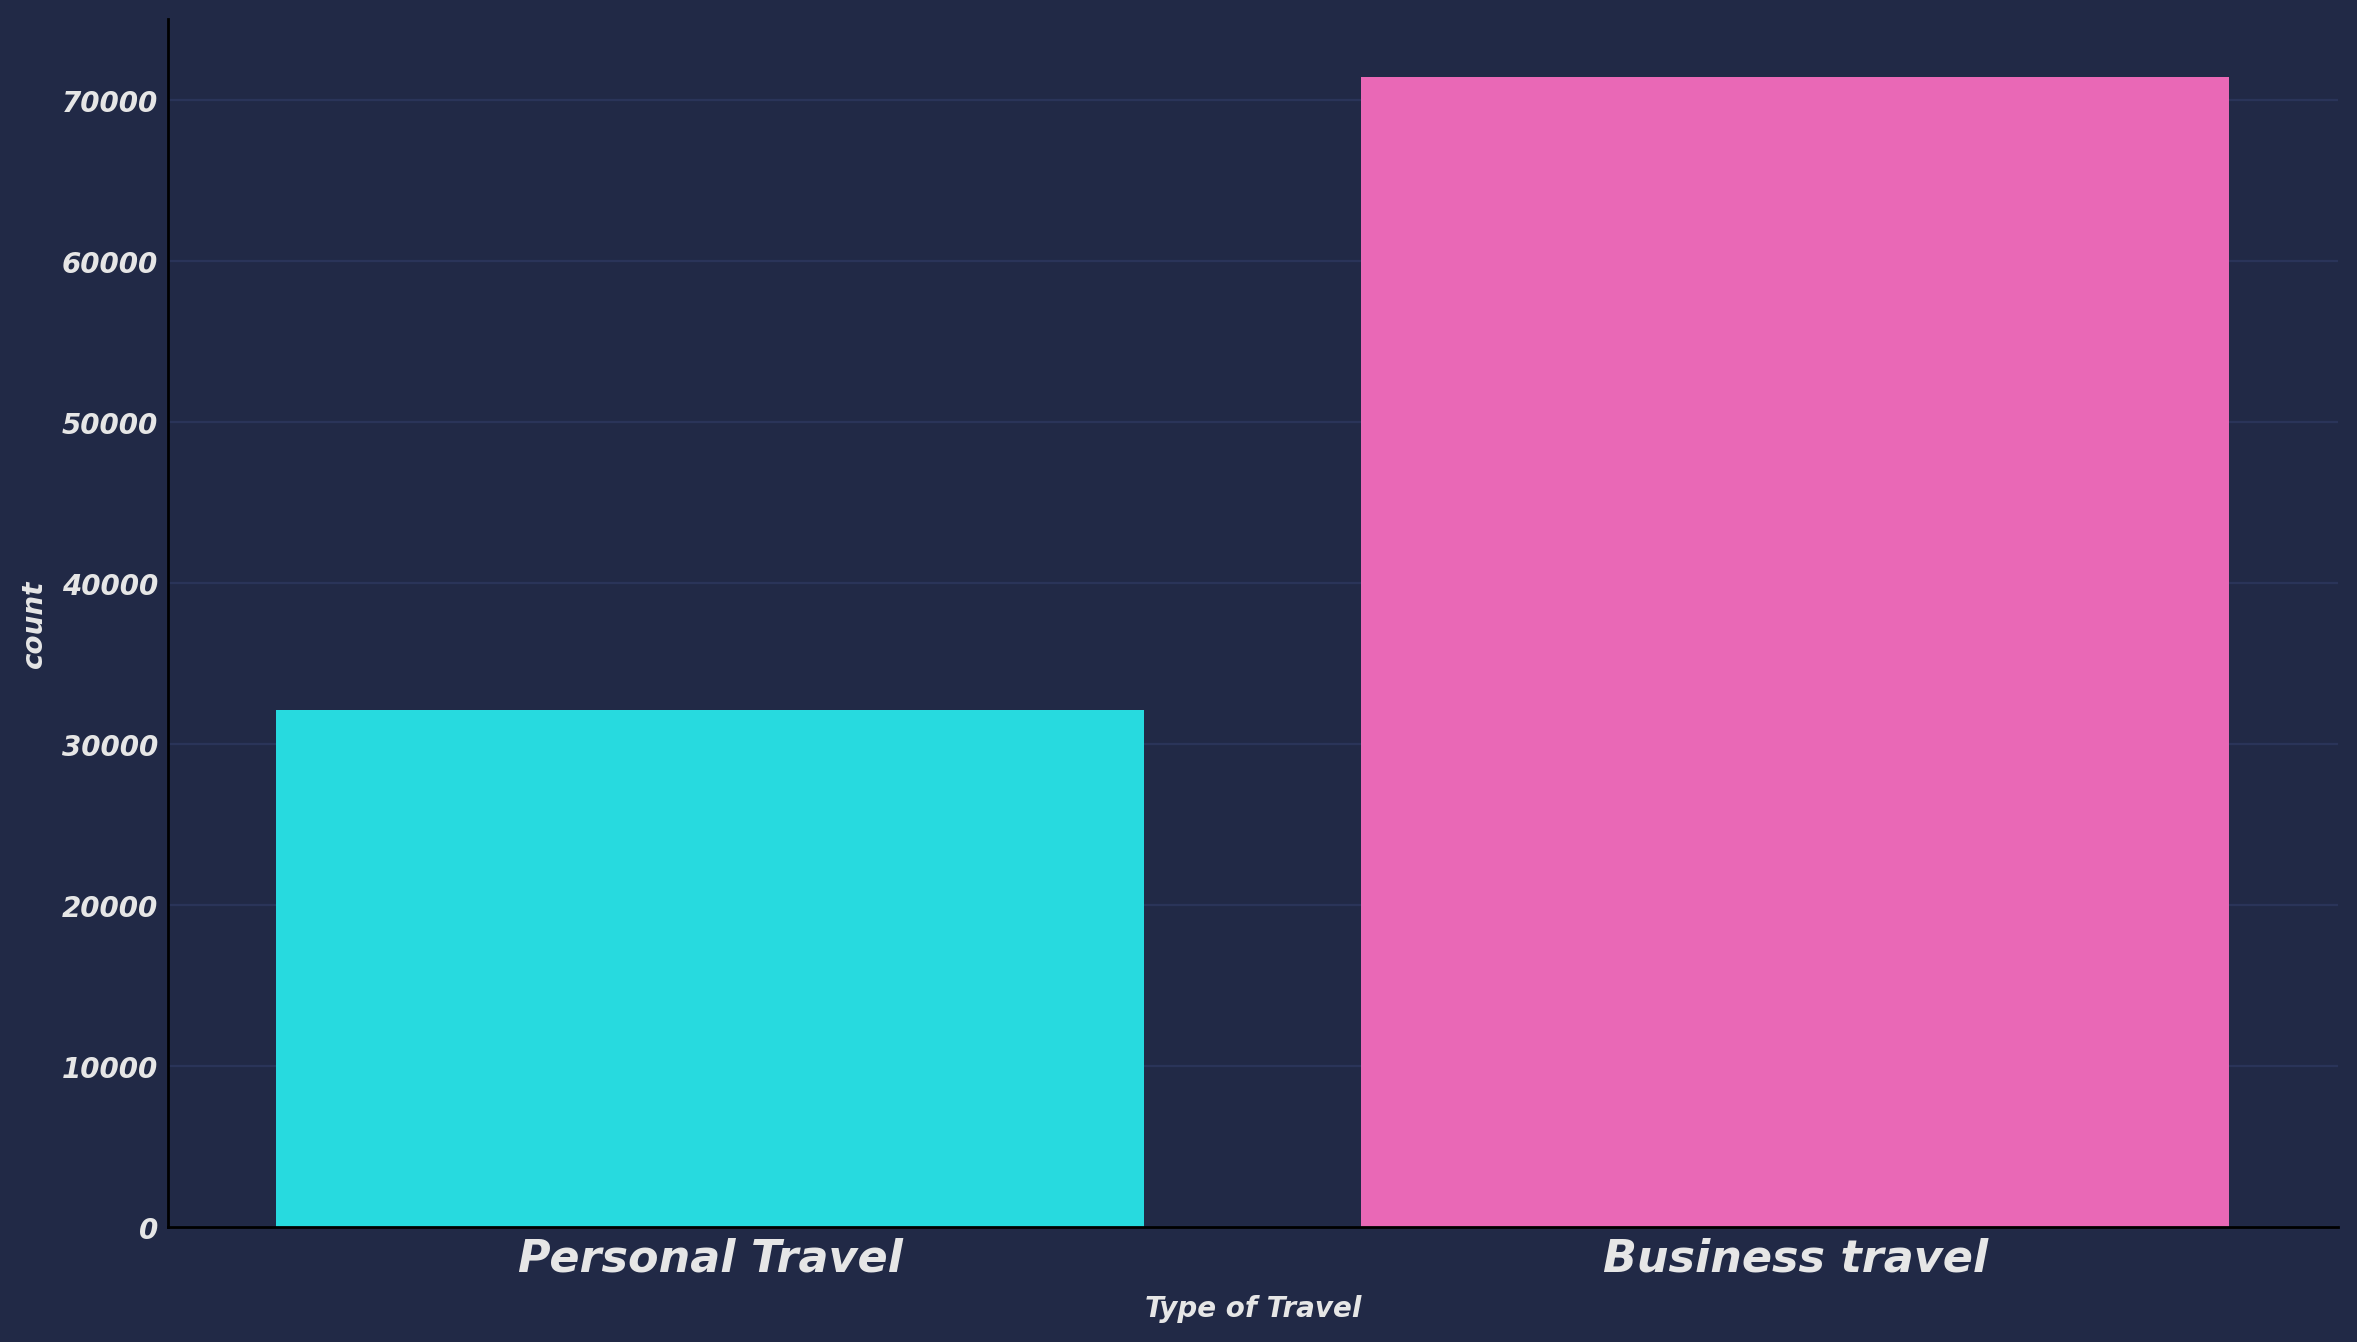

In [44]:
plt.figure(figsize=(14,8))

sns.countplot(train["Type of Travel"])

plt.xticks(size=16) 

In [45]:
train.groupby("Type of Travel")["satisfaction"].value_counts().to_frame()

satisfaction
Type of Travel  satisfaction                         
Business travel satisfied                       41634
                neutral or dissatisfied         29831
Personal Travel neutral or dissatisfied         28866
                satisfied                        3263

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

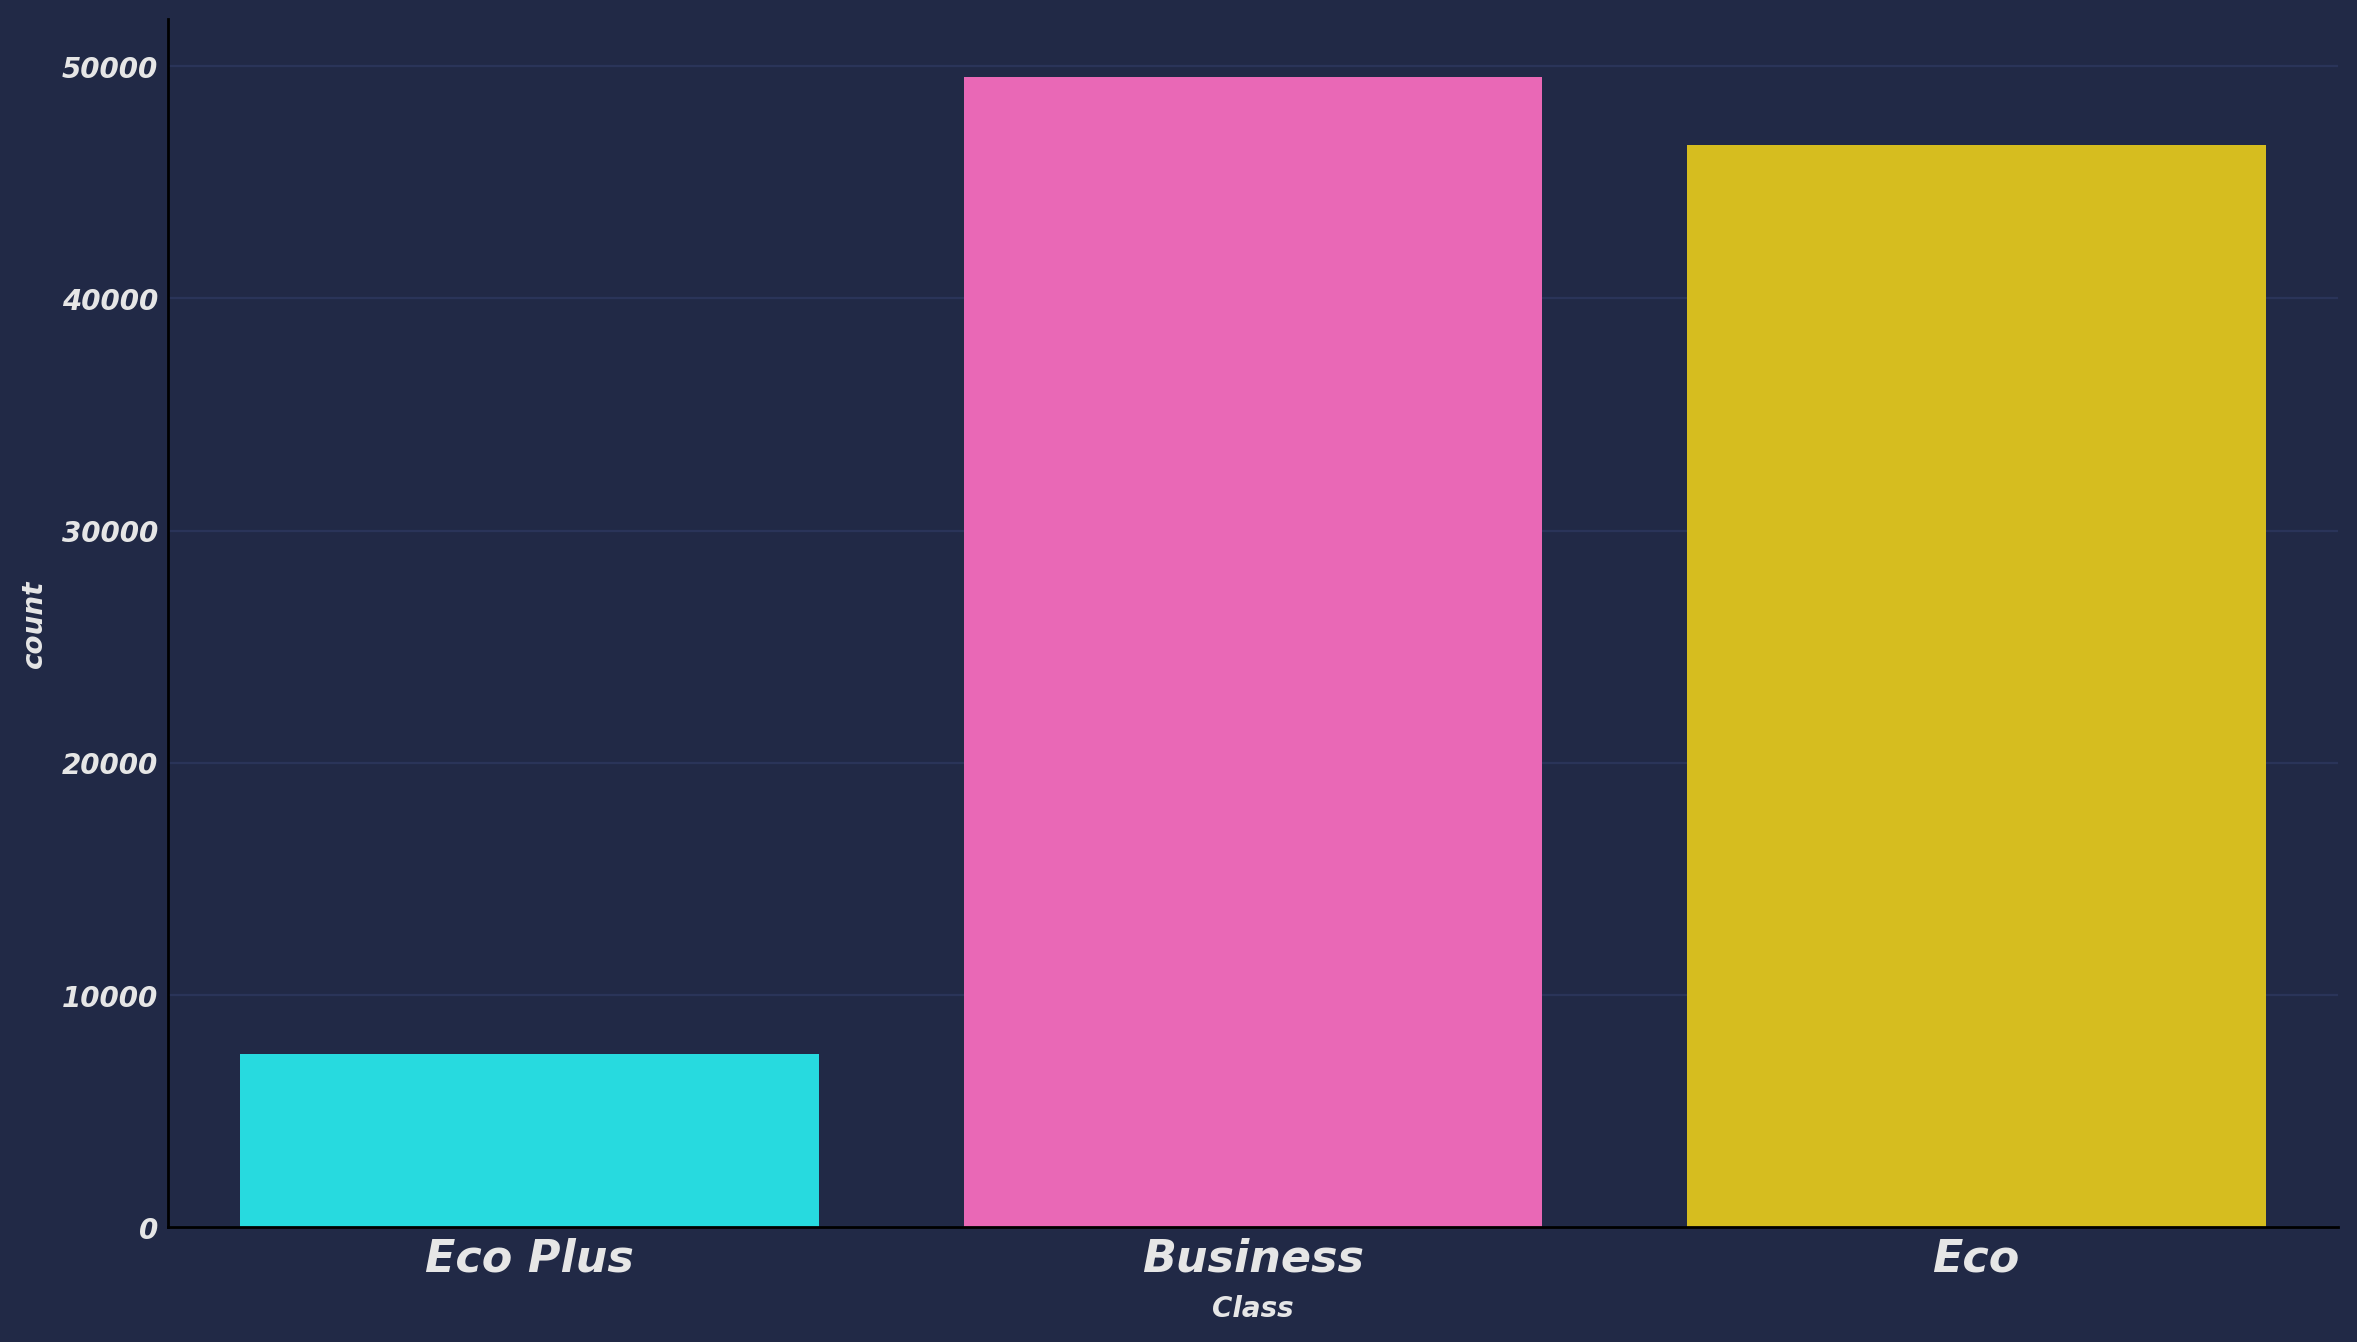

In [47]:
plt.figure(figsize=(14,8))

sns.countplot(train["Class"])

plt.xticks(size=16) 

In [48]:
train.groupby("Class")["satisfaction"].value_counts().to_frame()

satisfaction
Class    satisfaction                         
Business satisfied                       34390
         neutral or dissatisfied         15143
Eco      neutral or dissatisfied         37922
         satisfied                        8671
Eco Plus neutral or dissatisfied          5632
         satisfied                        1836

In [50]:
train.groupby(["Gender","Type of Travel","Class"])["satisfaction"].value_counts().to_frame()

satisfaction
Gender Type of Travel  Class    satisfaction                         
Female Business travel Business satisfied                       17044
                                neutral or dissatisfied          6752
                       Eco      neutral or dissatisfied          7518
                                satisfied                        3004
                       Eco Plus neutral or dissatisfied          1344
                                satisfied                         771
       Personal Travel Business neutral or dissatisfied           942
                                satisfied                         130
                       Eco      neutral or dissatisfied         11891
                                satisfied                        1363
                       Eco Plus neutral or dissatisfied          1660
                                satisfied                         157
Male   Business travel Business satisfied                       17082
                                neutral or dissatisfied          6506
                       Eco      neutral or dissatisfied          6701
                                satisfied                        2979
                       Eco Plus neutral or dissatisfied          1010
                                satisfied                         754
       Personal Travel Business neutral or dissatisfied           943
                                satisfied                         134
                       Eco      neutral or dissatisfied         11812
                                satisfied                        1325
                       Eco Plus neutral or dissatisfied          1618
                                satisfied                         154

In [10]:
number.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


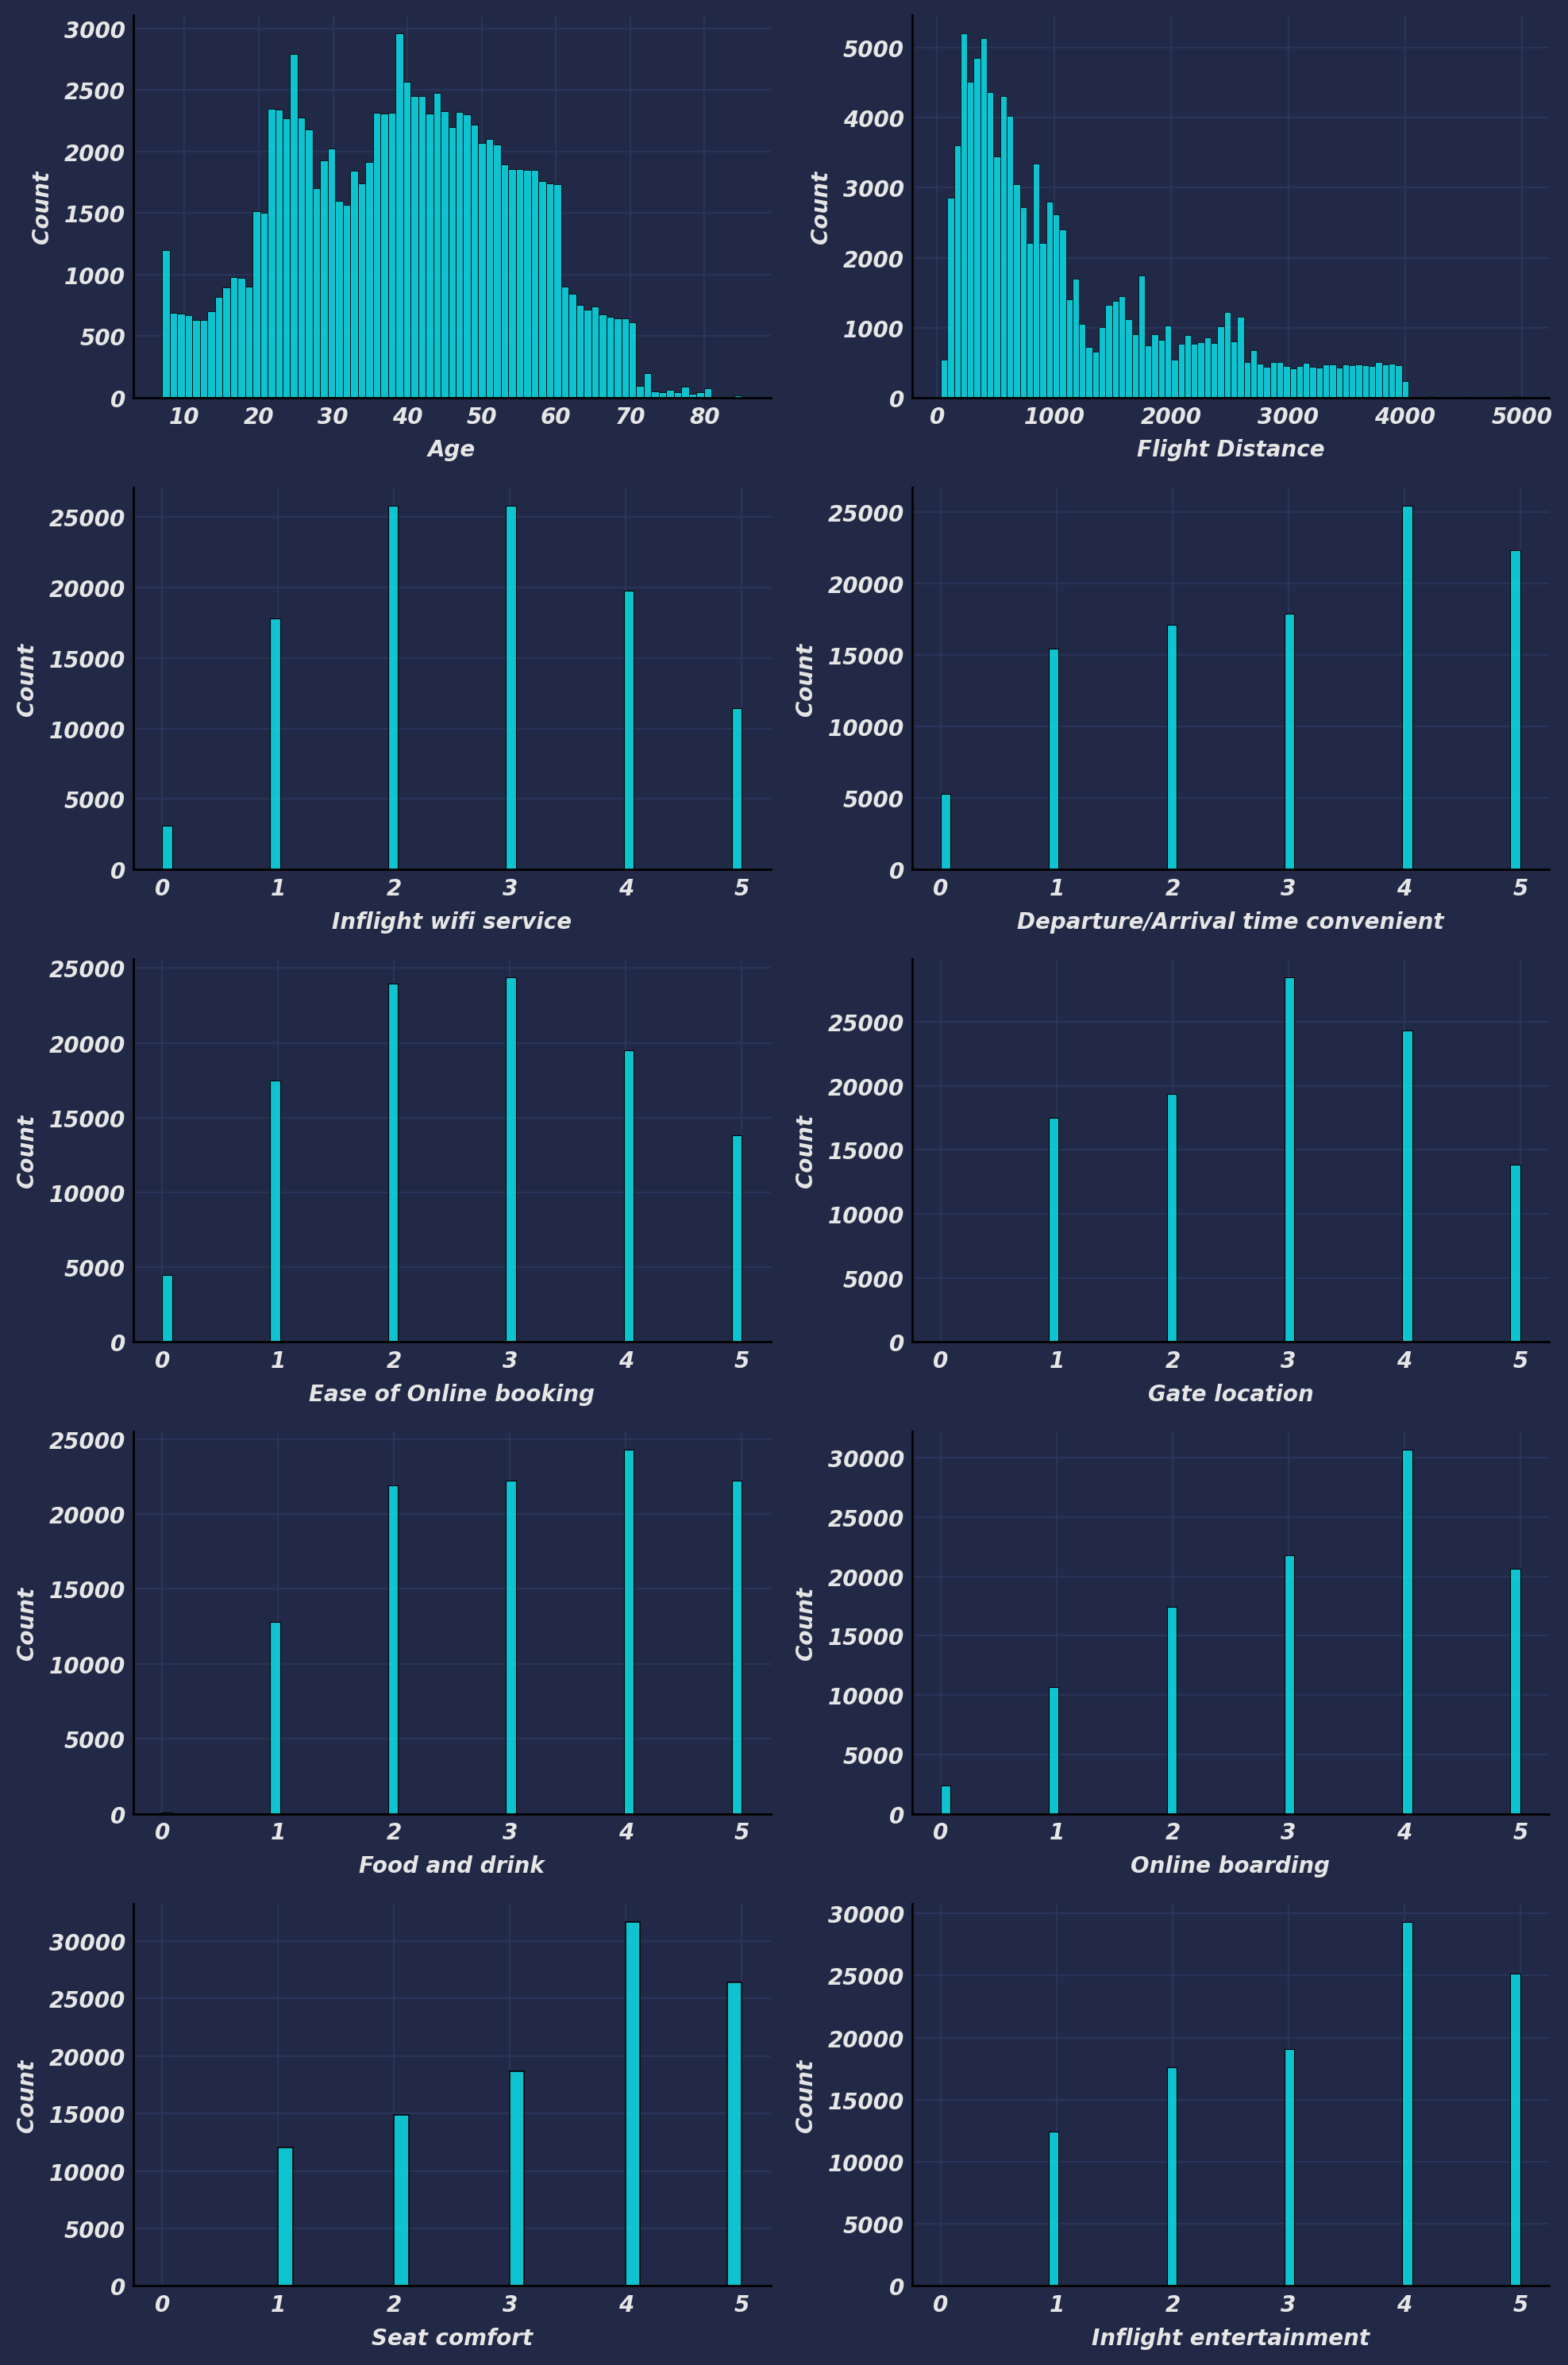

In [18]:
plt.figure(figsize=(10,15))
for i,j in enumerate(number.iloc[:,:10].columns):
    plt.subplot(5,2, i+1)
    
    sns.histplot(train[j])
    
plt.tight_layout()
plt.show() 

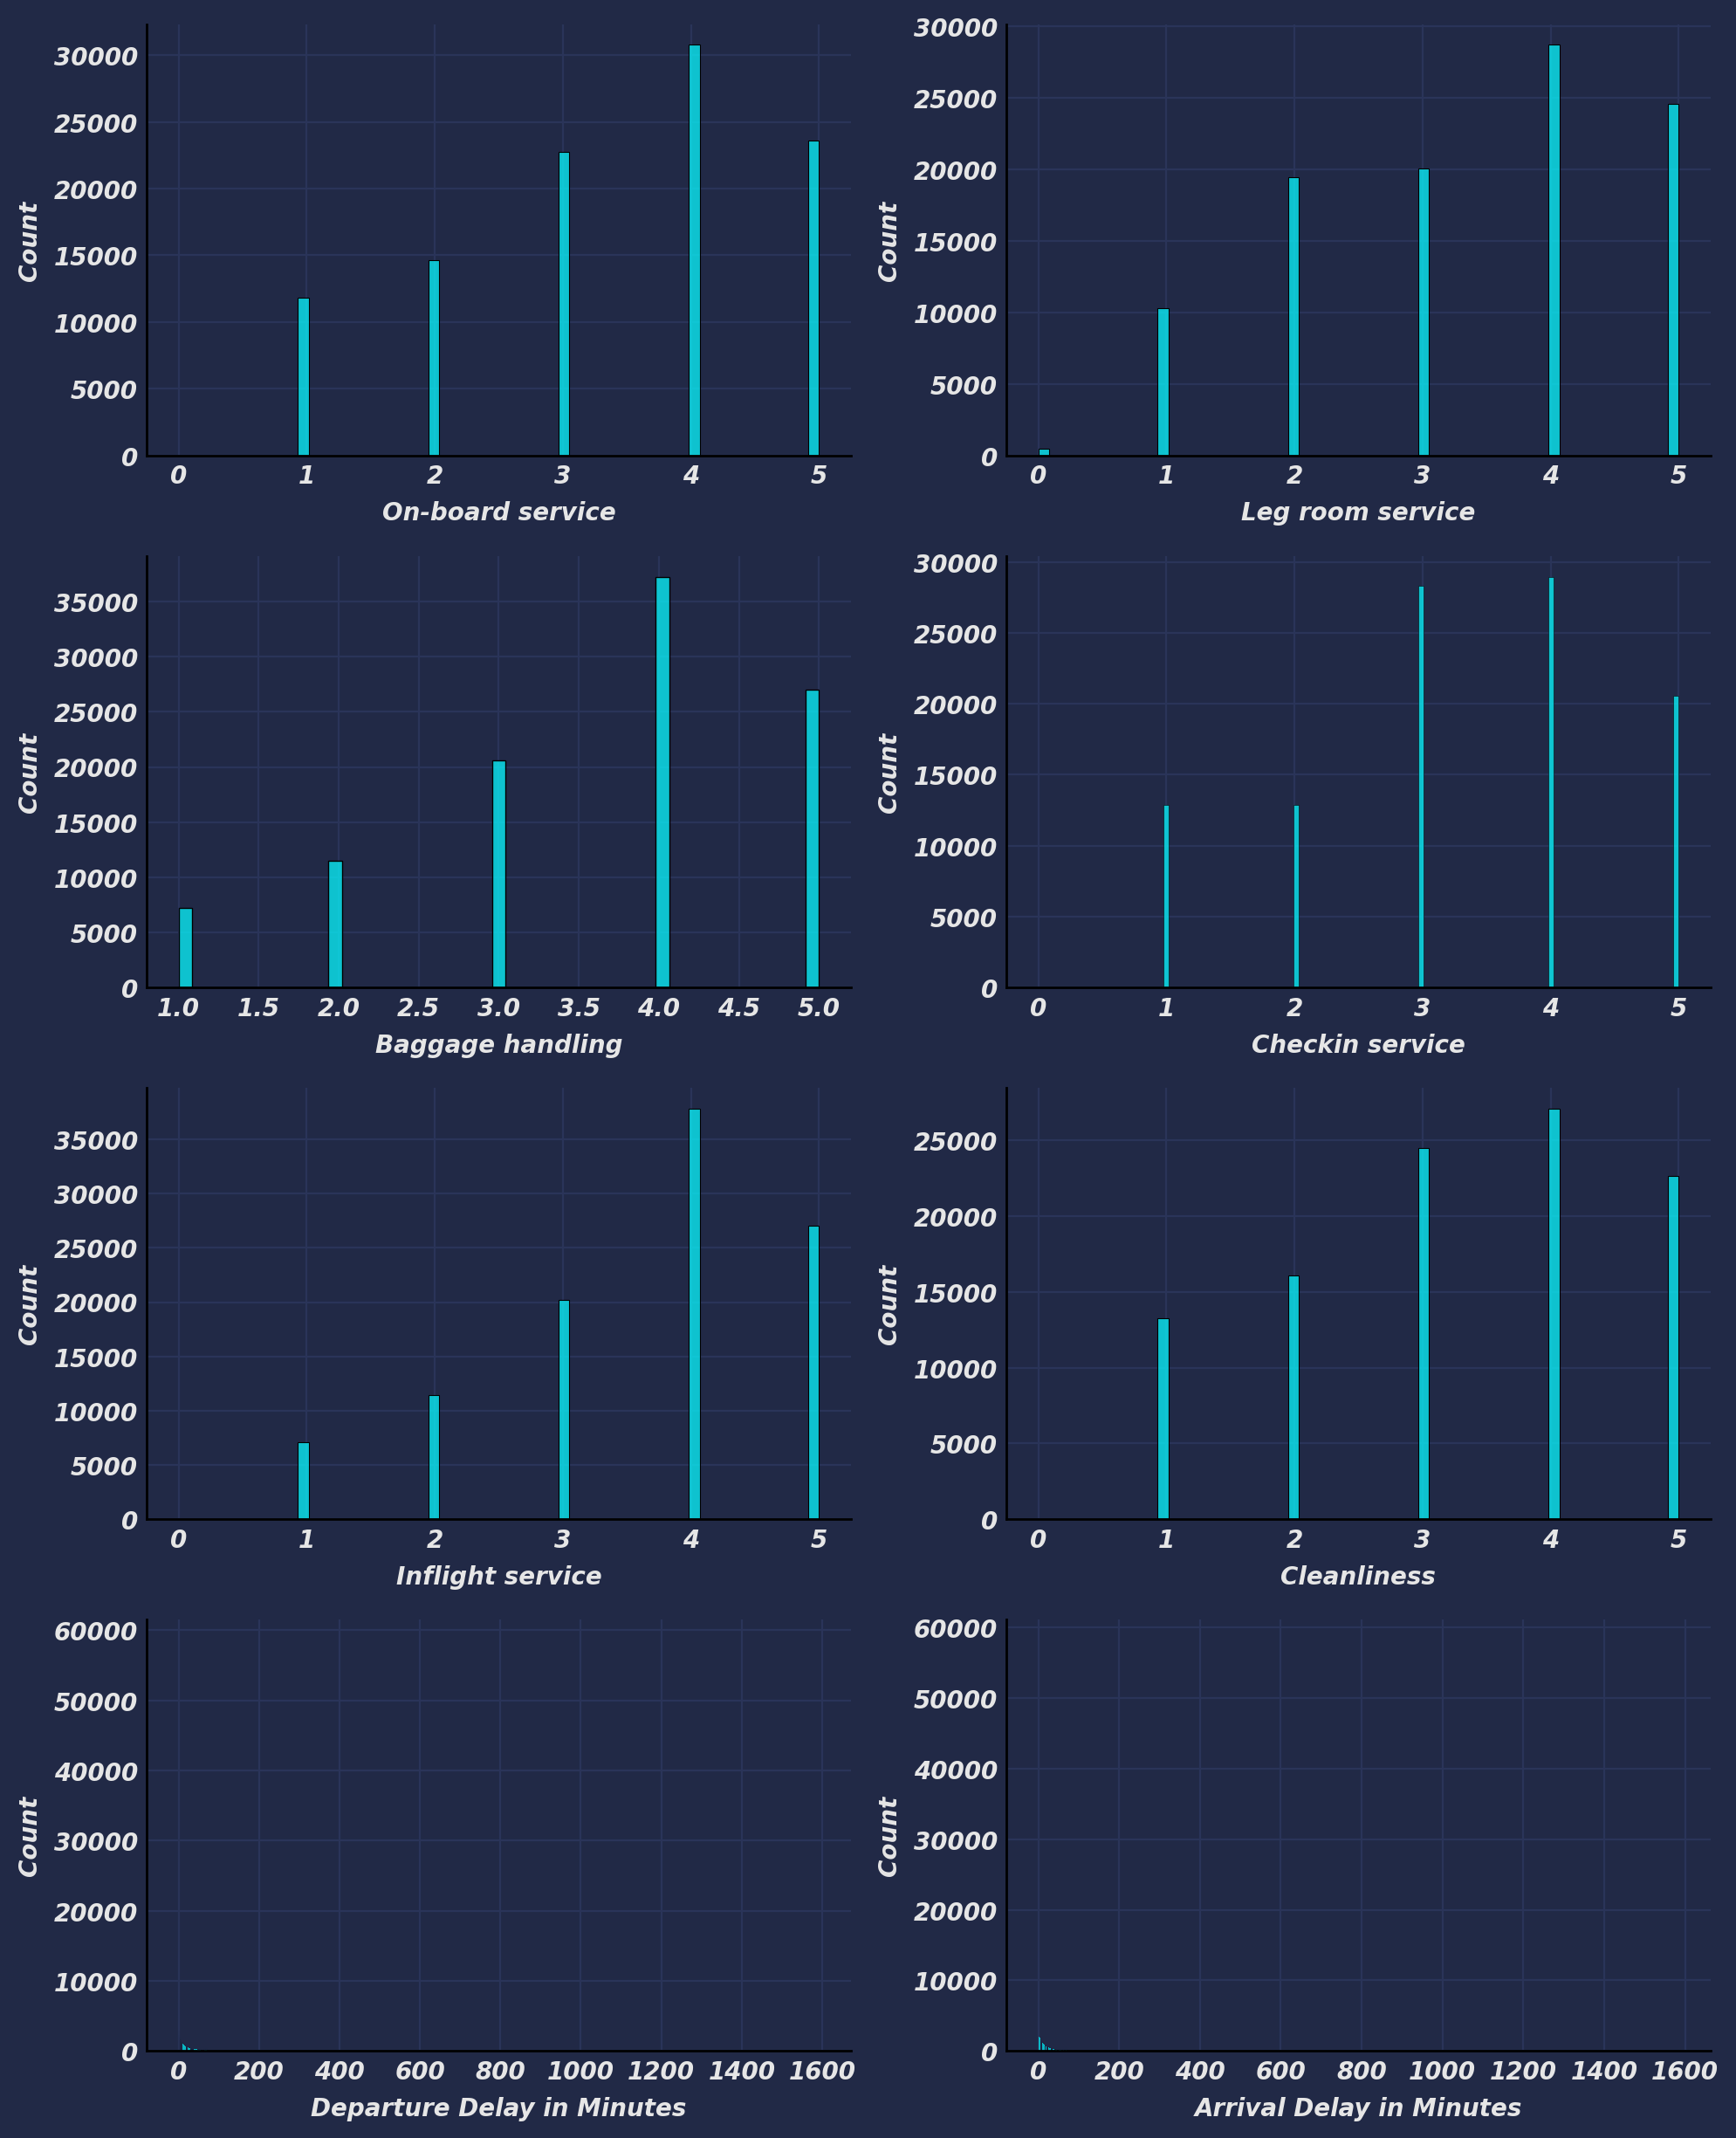

In [19]:
plt.figure(figsize=(10,15))
for i,j in enumerate(number.iloc[:,10:].columns):
    plt.subplot(5,2,i+1)
    
    sns.histplot(train[j])
    
plt.tight_layout()
plt.show() 

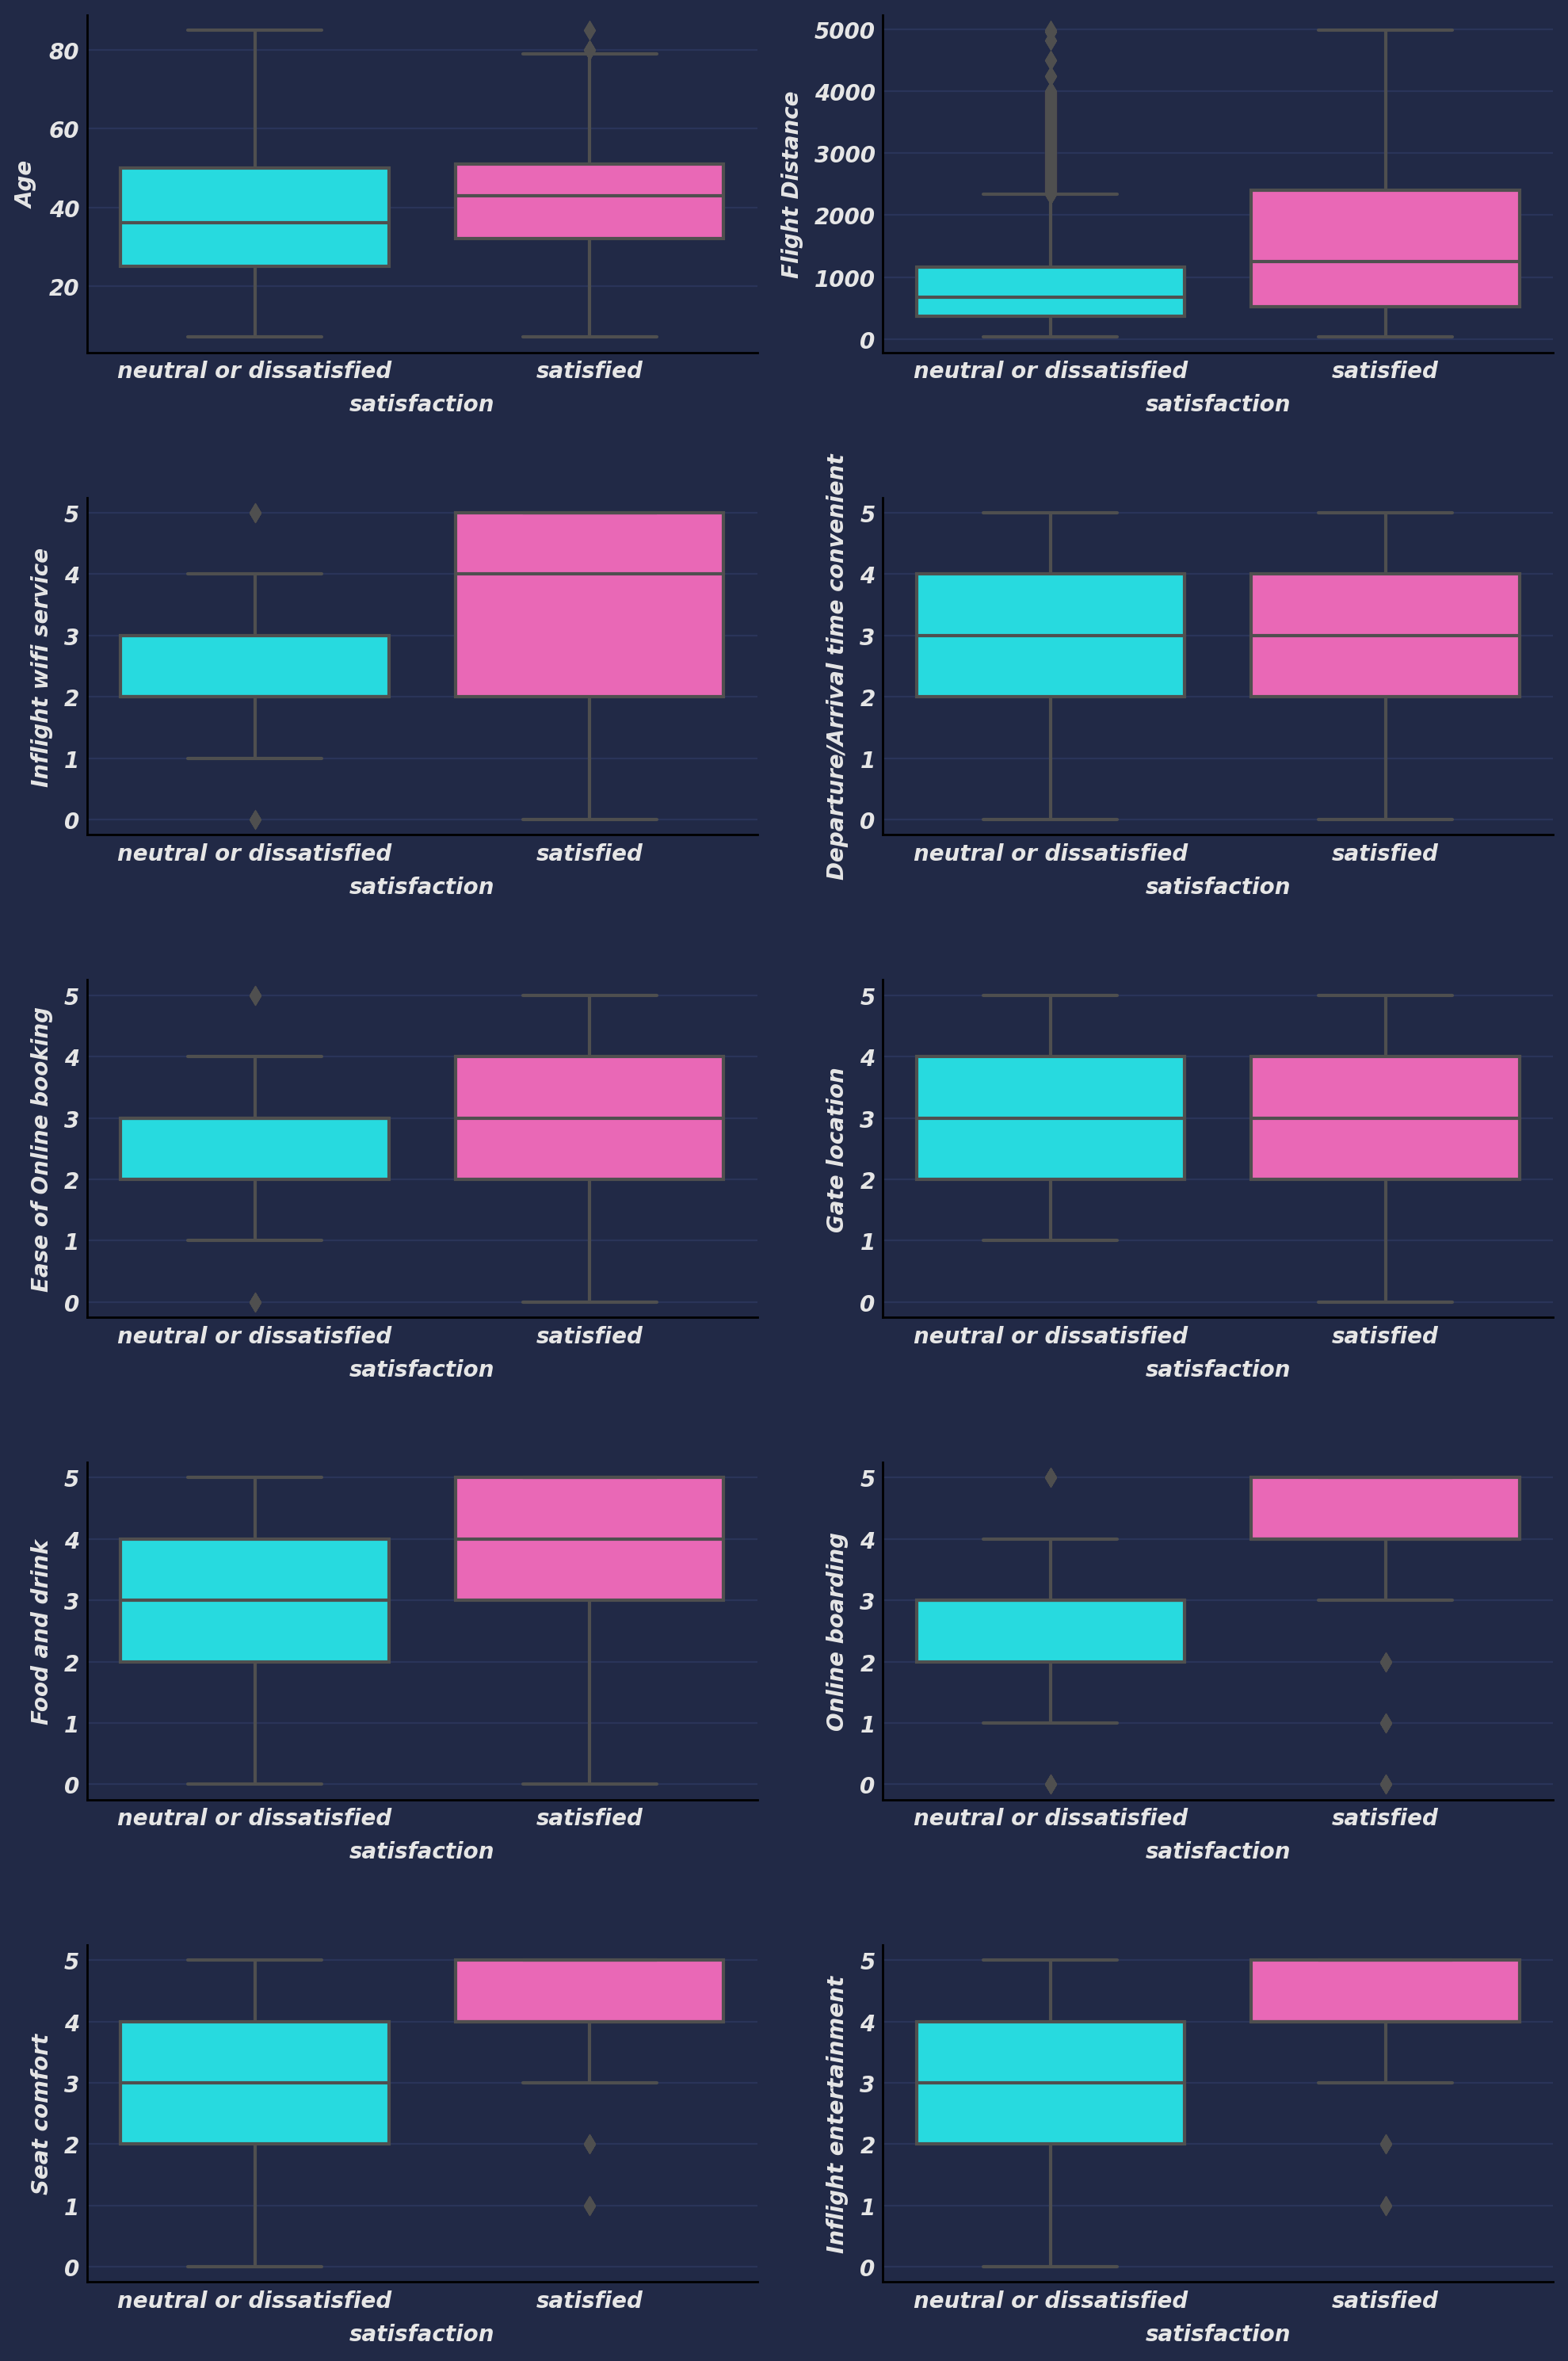

In [16]:
plt.figure(figsize=(10,15))
for i,j in enumerate(number.iloc[:,:10].columns):
    plt.subplot(5,2, i+1)
    
    sns.boxplot(x=train["satisfaction"],y=train[j])
    
plt.tight_layout()
plt.show() 

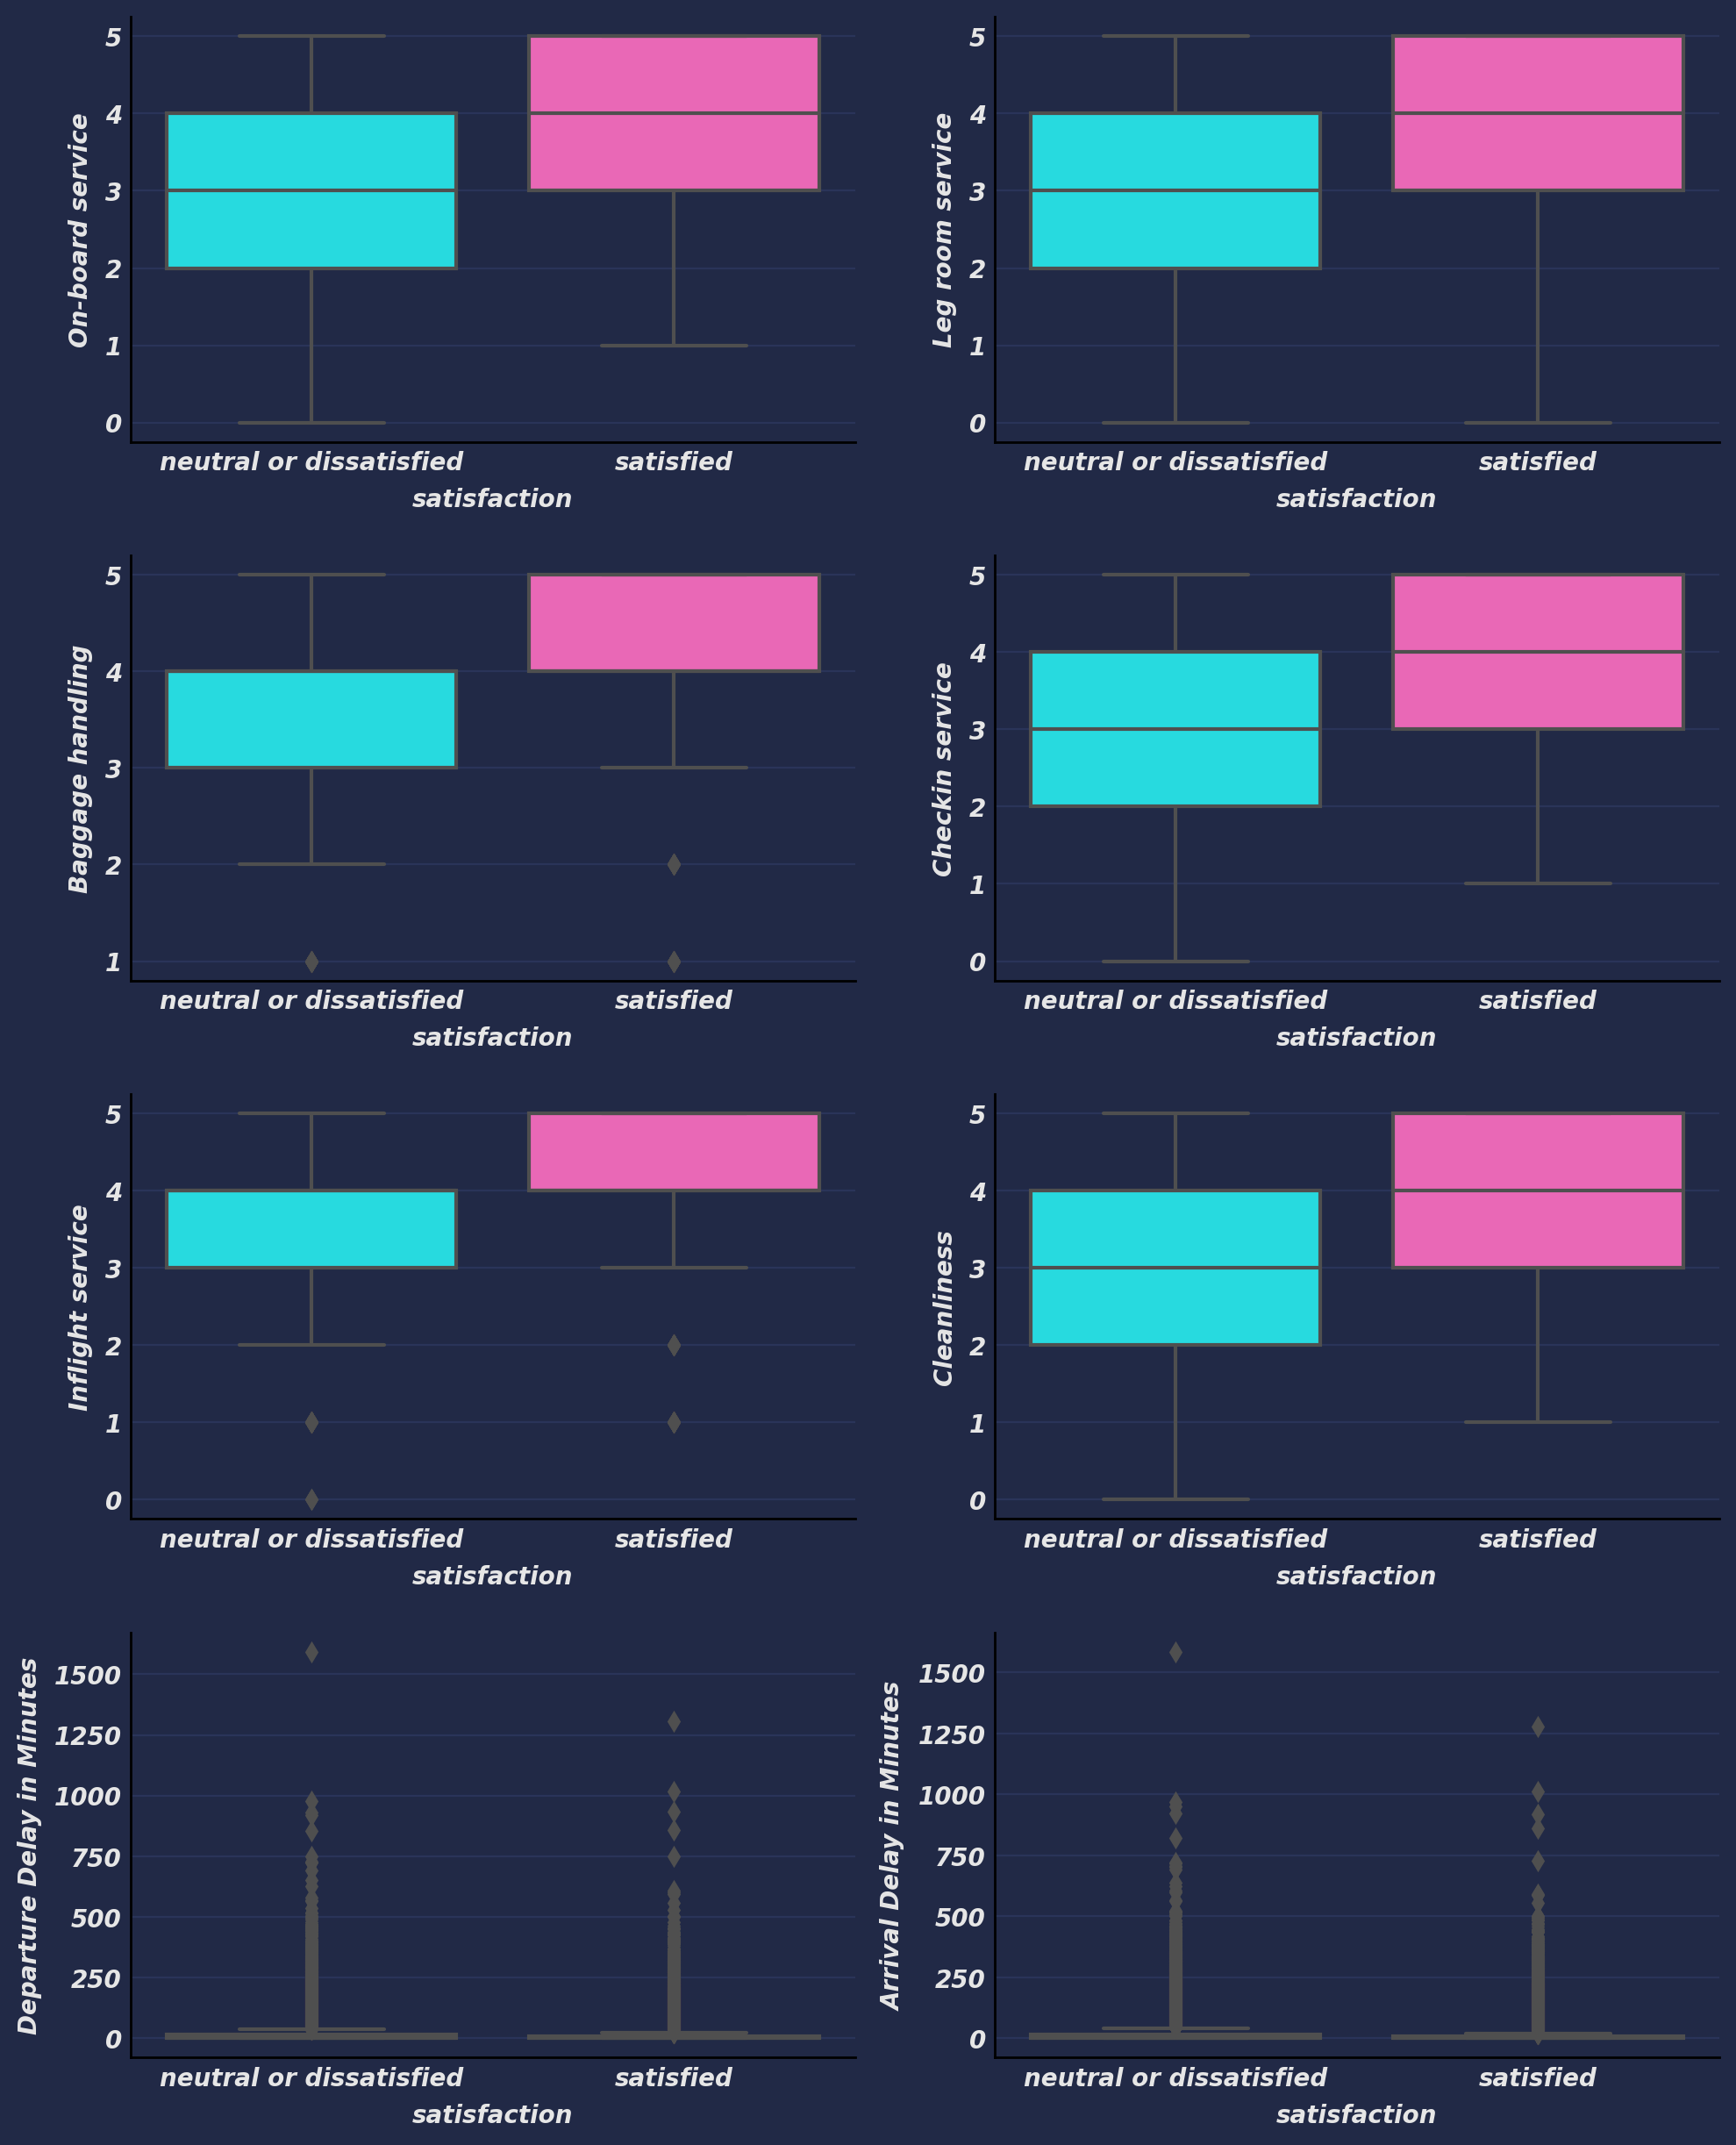

In [22]:
plt.figure(figsize=(10,15))
for i,j in enumerate(number.iloc[:,10:].columns):
    plt.subplot(5,2, i+1)
    
    sns.boxplot(x=train["satisfaction"],y=train[j])
    
plt.tight_layout()
plt.show() 

In [ ]:
#Feature Engineering

In [11]:
for i in [train,test]:
    i["Arrival Delay in Minutes"] = i["Arrival Delay in Minutes"].astype("int") 

In [132]:
train.sample(10) 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Arrival Delay in Hours,Departure Delay in Hours,Arrival lebih 1 jam/tidak,Departure lebih 1 jam/tidak
80737,Male,Loyal Customer,45,Business travel,Business,2811,4,2,4,4,...,3,4,4,1,0,satisfied,00,00,No,No
27387,Male,Loyal Customer,38,Business travel,Business,3382,2,1,1,1,...,2,2,2,5,12,neutral or dissatisfied,00,00,No,No
71931,Female,Loyal Customer,32,Business travel,Eco,308,4,4,4,4,...,2,3,4,18,14,neutral or dissatisfied,00,00,No,No
254,Female,Loyal Customer,45,Business travel,Business,1587,2,2,2,2,...,4,4,3,0,0,satisfied,00,00,No,No
51739,Male,Loyal Customer,39,Business travel,Business,3061,1,1,1,1,...,3,4,3,33,24,satisfied,00,00,No,No
31687,Male,Loyal Customer,45,Business travel,Business,2848,3,3,3,3,...,1,4,4,0,0,satisfied,00,00,No,No
95529,Female,Loyal Customer,32,Business travel,Eco Plus,641,3,1,1,1,...,3,4,3,4,10,neutral or dissatisfied,00,00,No,No
92680,Female,Loyal Customer,48,Business travel,Business,1718,4,4,4,4,...,5,4,5,0,0,satisfied,00,00,No,No
6072,Female,Loyal Customer,44,Business travel,Business,1664,3,3,3,3,...,5,4,3,0,0,satisfied,00,00,No,No
12150,Female,Loyal Customer,12,Personal Travel,Eco Plus,589,4,1,4,1,...,1,1,4,0,0,neutral or dissatisfied,00,00,No,No


In [119]:
for i in [train,test]:
    i["Arrival Delay in Hours"] = pd.to_datetime(i["Arrival Delay in Minutes"], unit='m').dt.strftime('%H').astype("object") 
    i["Departure Delay in Hours"] = pd.to_datetime(i["Departure Delay in Minutes"], unit='m').dt.strftime('%H').astype("object")    

In [131]:
for i in [train,test]:
    i["Arrival lebih 1 jam/tidak"] = i["Arrival Delay in Hours"].apply(lambda x: "Yes" if x > "01" else "No") 
    i["Departure lebih 1 jam/tidak"] = i["Departure Delay in Hours"].apply(lambda x: "Yes" if x > "01" else "No") 
    

In [135]:
for i in [train,test]:
    i["Arrival Delay in Hours"] = i["Arrival Delay in Hours"].astype("int") 
    i["Departure Delay in Hours"] = i["Departure Delay in Hours"].astype("int")    

In [ ]:
#Debugging

In [136]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103594 non-null  object
 1   Customer Type                      103594 non-null  object
 2   Age                                103594 non-null  int64 
 3   Type of Travel                     103594 non-null  object
 4   Class                              103594 non-null  object
 5   Flight Distance                    103594 non-null  int64 
 6   Inflight wifi service              103594 non-null  int64 
 7   Departure/Arrival time convenient  103594 non-null  int64 
 8   Ease of Online booking             103594 non-null  int64 
 9   Gate location                      103594 non-null  int64 
 10  Food and drink                     103594 non-null  int64 
 11  Online boarding                    103594 non-null  

In [137]:
print(train.shape)
print(test.shape)
print("")
print(train.duplicated().sum())
print("")
print(train.isnull().any().sum())
print(test.isnull().any().sum())

(103594, 27)
(25893, 27)

0

0
0


In [ ]:
#final

In [138]:
train.to_csv("train_satisfaction(clean).csv", index=False) 
test.to_csv("test_satisfaction(clean).csv", index=False) 